# Proyecto 2: Computación II

Ingeniería en estadística, Universidad de Valparaíso

Matías Rojas - Jeremías Bordon - Bastián Barraza

Profesor: Eduardo Jorquera - eduardo.jorquera@postgrado.uv.cl

##### Primero vamos a llamar a las librerías que serán utilizadas en el proyecto.

In [10]:
library(gutenbergr)
library(tidytext)
library(dplyr)
library(stringr)
data(stop_words)
library(tidyr)
library(wordcloud)
library(reshape2)
library(ggplot2)

# I 

### 1.- Usando la librería gutenbergr descargue la obra número 31 de la indexación como lo hemos visto en clase, que corresponde a "Plays of Sophocles: Oedipus the King; Oedipus at Colonus; Antigone".

In [6]:
lib31 = gutenberg_download(31) #se descarga el capitulo 31 de gutenberg
head(lib31) #se muestra lo definido anteriormente

Determining mirror for Project Gutenberg from http://www.gutenberg.org/robot/harvest
Using mirror http://aleph.gutenberg.org


gutenberg_id,text
<int>,<chr>
31,SOPHOCLES
31,
31,OEDIPUS THE KING
31,
31,"Translation by F. Storr, BA"
31,"Formerly Scholar of Trinity College, Cambridge"


### 2.- Quite todo lo que está antes de "ARGUMENT". Luego, de todas las palabras enteras que estén en mayúsculas, muestre las únicas (es decir, sin repetirse al ser mostradas).

In [44]:
lib31 = lib31[-c(1:16),] #se elimina el id del 1 al 16

lib31 = lib31 %>%
    group_by(gutenberg_id) %>%
    mutate(linenumber = row_number()) #se crea una nueva variable con todas las palabras que cumplan la condicion
    
lib31_tokens=lib31 %>% #se define lib31_tokens
    unnest_tokens(word,text,to_lower=FALSE) %>% #separa cada palabra en filas
    count(word,sort=TRUE)  #te cuenta las palabras
    mayusc=str_subset(lib31_tokens$word,"[A-Z]+[A-Z]") #te muestra las mayusculas
mayusc

[1] "OEDIPUS"    "CHORUS"     "CREON"      "ANTIGONE"   "ISMENE"    
 [6] "MESSENGER"  "THESEUS"    "JOCASTA"    "TEIRESIAS"  "HERDSMAN"  
[11] "HAEMON"     "GUARD"      "POLYNEICES" "STRANGER"   "SECOND"    
[16] "PRIEST"     "EURYDICE"   "ARGUMENT"   "AT"         "BA"        
[21] "COLONUS"    "DRAMATIS"   "FOOTNOTES"  "MA"         "PERSONAE"  
[26] "SOPHOCLES"  "BOY"        "BYSTANDERS" "KING"       "OF"        
[31] "SUPPLIANTS" "THE"        "WATCHMAN"   "ZEUS"

### 3.- Construya una nube de palabras con los términos más frecuentes de la obra, donde NO se muestren palabras vacías, y tampoco las palabras que estén completamente en mayúsculas; quite también donde dice "(Str. x)" y "(Ant. x)", donde x es un número.

Joining, by = "word"


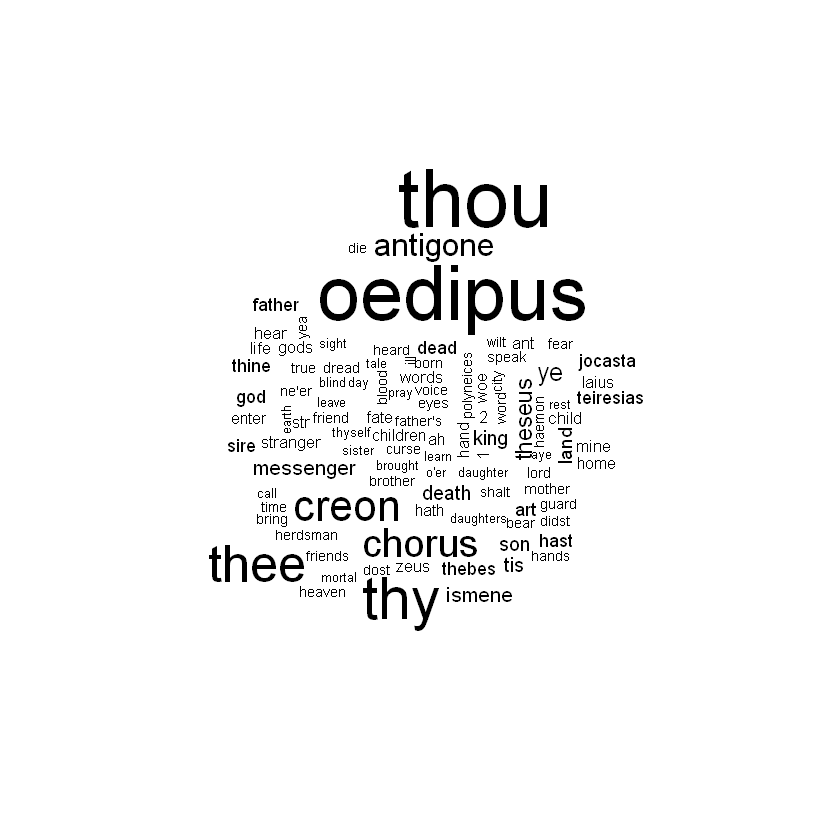

In [13]:
text=gutenberg_download(31) #se descarga el capitulo 31
data(stop_words)
text1=data.frame("id"=1:7575,text) #se crea un dataframe con id del 1 al 7575
text2=text1[-c(1:16),] #se elimina el id del dataframe del 1 al 16
dataque=text2%>% 
unnest_tokens(word,text,to_lower=TRUE)%>% #se divide las palabras en filas con el unnest_tokens
anti_join(stop_words) %>% #para que no se repitan
count(word) %>% #te cuenta las palabras
with(wordcloud(word, n, max.words = 100)) #se crea la nube de palabras#al usar anti_join hace que no se repitan

### 4.- Compare el análisis de sentimiento usando los tres léxicos vistos en clase, para el texto separado en trozos de 80 líneas. Visualice los resultados.

SE CREARÁ EL MISMO DATAFRAME CON UNA COLUMNA "LINES80" DONDE SE SEPARA EL TEXTO EN TROZOS DE 80 LINEAS.

In [40]:
lib31 = lib31 %>%
    group_by(gutenberg_id) %>%
    mutate(linenumber = row_number(), lines80 = 1)


#Con este ciclo, la columna "linenumber" serán números cíclicos del 1-80. 
c=1
a=c(1:80)
k=1

for (i in lib31$linenumber)  {
    if (lib31$linenumber[c] == 80*k){lib31$lines80[c(c:length(lib31$lines80))] = k+1
                   k=k+1}
        c=c+1
    }


#Libreria a token, para que quede todo odrdenado
lib31_token = lib31 %>%
    unnest_tokens(word, text, to_lower = FALSE) %>%
    anti_join(stop_words)

Joining, by = "word"


#### BING

Joining, by = "word"


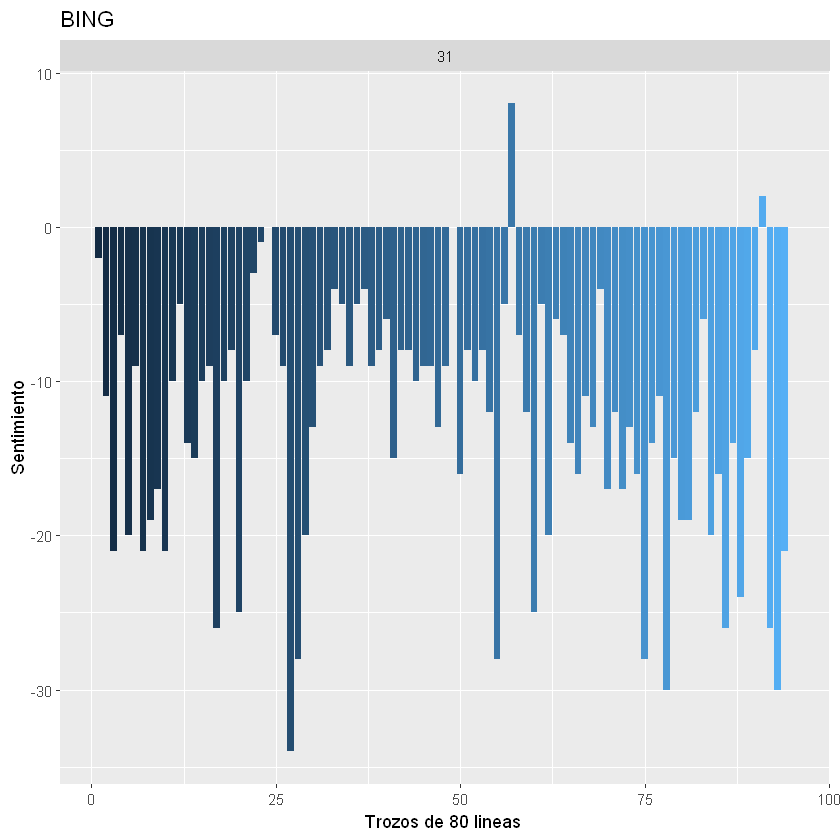

In [41]:
lib31_bing= lib31_token %>%
  inner_join(get_sentiments("bing")) %>% #Se agrega el lexico bing
    group_by(lines80) %>%
    count(sentiment) %>% #se cuentan los sentimientos (solo positive y negative)
    spread(sentiment, n, fill = 0) %>%
    mutate(total = positive - negative, # Se hace un total de los valores
          gutenber_id = 31)

#Grafico
ggplot(lib31_bing, aes(lines80, total, fill = lines80)) + 
    labs(x = "Trozos de 80 lineas ", y = "Sentimiento",title = "BING") +
  geom_col(show.legend = FALSE) +
  facet_wrap(~gutenber_id, ncol = 1, scales = "free_x")

#### AFINN

Joining, by = "word"


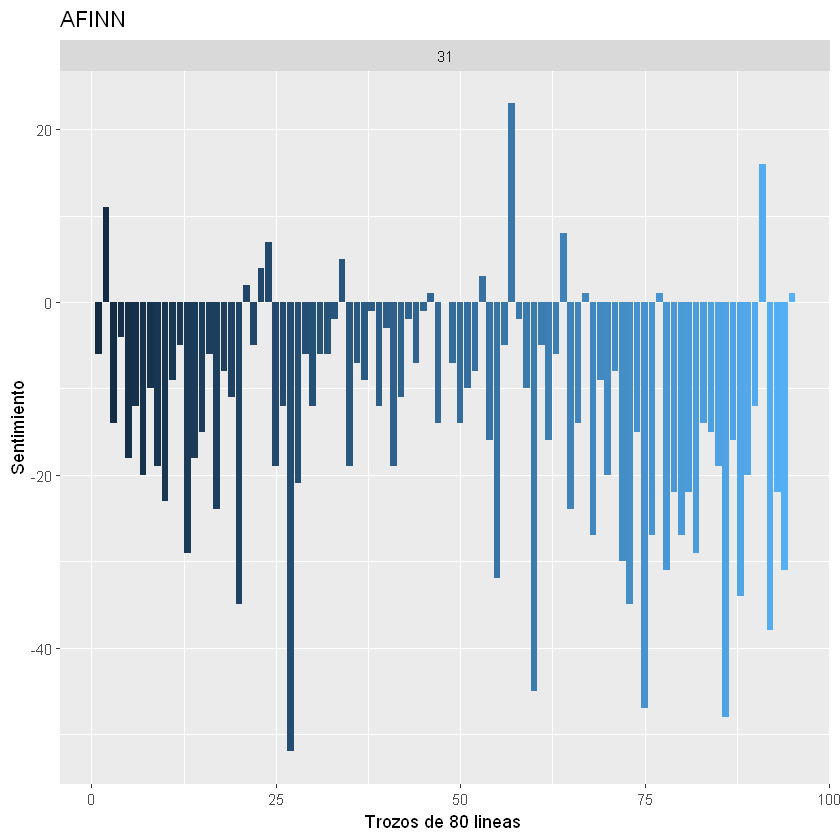

In [42]:
lib31_afinn= lib31_token %>%
  inner_join(get_sentiments("afinn")) %>% #Se agrega el lexico afinn
    group_by(lines80) %>%
    count(value) %>% #se cuentan las palabras
    mutate(total = sum(value*n), #Se hace un total de los valores
          gutenberg_id = 31)%>%
    spread(value,n, fill = 0)  

#grafico
ggplot(lib31_afinn, aes(lines80, total, fill = lines80)) +
    labs(x = "Trozos de 80 lineas ", y = "Sentimiento",title = "AFINN") +
  geom_col(show.legend = FALSE) +
  facet_wrap(~gutenberg_id, ncol = 2, scales = "free_x")

#### NRC

Joining, by = "word"


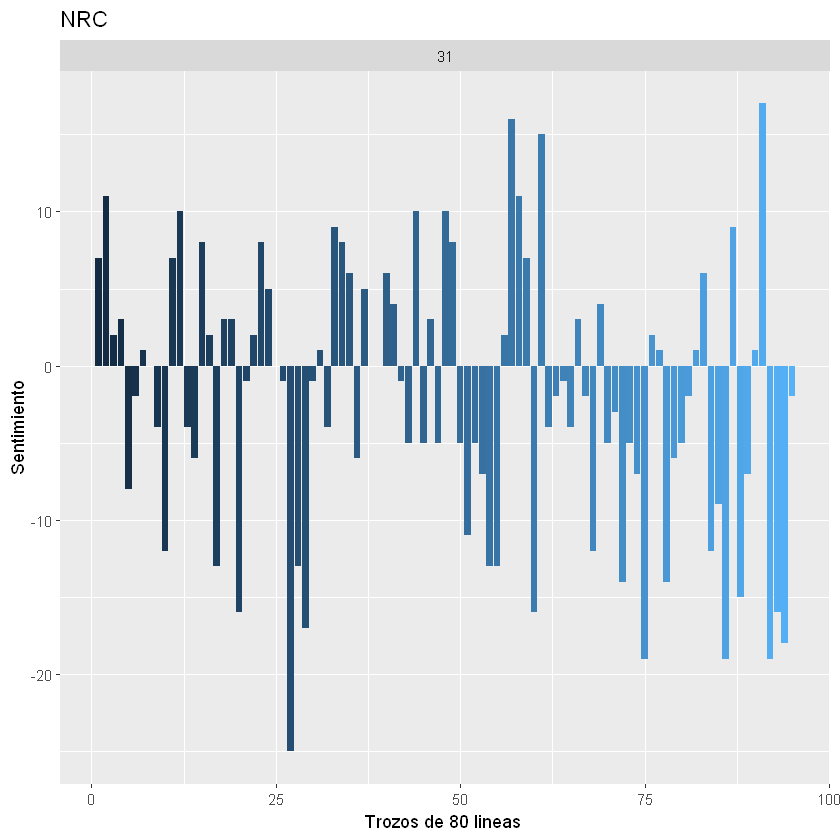

In [43]:
lib31_nrc= lib31_token %>%
  inner_join(get_sentiments("nrc")) %>% #Se agrega el lexico nrc
    group_by(lines80) %>%
    filter(sentiment %in% c("positive", "negative")) %>% #se filtran las palabras "positive" y "negative"
    count(sentiment) %>% #contar los sentimientos filtrados
    spread(sentiment,n, fill = 0) %>% #juntar todo en solo una linea
    mutate(total = positive - negative, #Se hace un total de ello
        gutenberg_id = 31) 

#Gráfico
ggplot(lib31_nrc, aes(lines80,total , fill = lines80)) + 
    labs(x = "Trozos de 80 lineas ", y = "Sentimiento",title = "NRC") +
  geom_col(show.legend = FALSE) +
  facet_wrap(~gutenberg_id, ncol = 2, scales = "free_x")

### 5.- ¿Cuáles son las palabras positivas y negativas más comunes (frecuentes) según los léxicos de Bing et.al. y NRC?

In [16]:
text = gutenberg_download(31) #se descarga el capitulo 31 de gutenberg
#LÉXICO BING
print("léxico bing")
tidy_books <- text %>% #se define tidy_books
  unnest_tokens(word, text) #se separa cada palabra en filas
sentiment_bing <- tidy_books %>% #se definen los sentimientos para bing
inner_join(get_sentiments("bing") %>%  #se ingresa a los sentimientos de bing
                    filter(sentiment %in% c("positive","negative"))) %>% #se filtra sentiment para que muestre los positivo y negativo
count(word, sentiment,sort=TRUE) #cuenta las palabras de los sentimientos de mayor a menos con el sort
head(sentiment_bing)
#LÉXICO NRC
print("léxico nrc")
sentiment_nrc = tidy_books %>% #se definen los sentimientos para nrc
      inner_join(get_sentiments("nrc") %>% #se juntan los sentimientos de nrc
                                         filter(sentiment %in% c("positive", 
                                                                 "negative"))) %>% #se filtra para negativo y positivo
count(word, sentiment,sort=TRUE) #cuenta las palabras con cada sentimiento de mayor a menor
head(sentiment_nrc)

[1] "léxico bing"


Joining, by = "word"


word,sentiment,n
<chr>,<chr>,<int>
death,negative,66
well,positive,65
dead,negative,56
like,positive,56
stranger,negative,49
woe,negative,40


[1] "léxico nrc"


Joining, by = "word"


word,sentiment,n
<chr>,<chr>,<int>
chorus,positive,207
king,positive,70
death,negative,66
land,positive,65
art,positive,63
god,positive,57


### 6.- Para ambos resultados de la pregunta anterior, grafique una nube de palabras por cada uno de los dos léxicos mencionadoes, donde por un lado se muestre la parte positiva del texto, y por el otro la parte negativa.

#### Léxico BING:

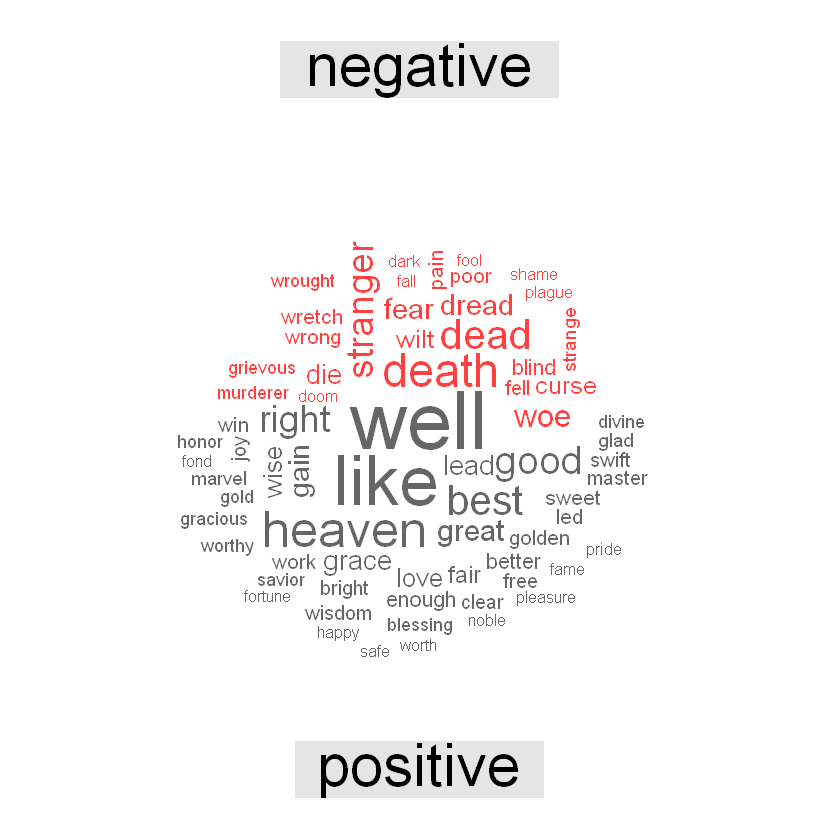

In [22]:
#LÉXICO BING
wordcloud_bing = sentiment_bing %>% #se define la nube de palabras
    acast(word ~ sentiment, value.var ="n", fill = 0) %>% #se usa la función acast de la librería reshape2 para ajustar el dataframe
    comparison.cloud( colors = c("brown1", "gray40"), max.words=70) #se crean las 2 nubes

#### Léxico NRC:

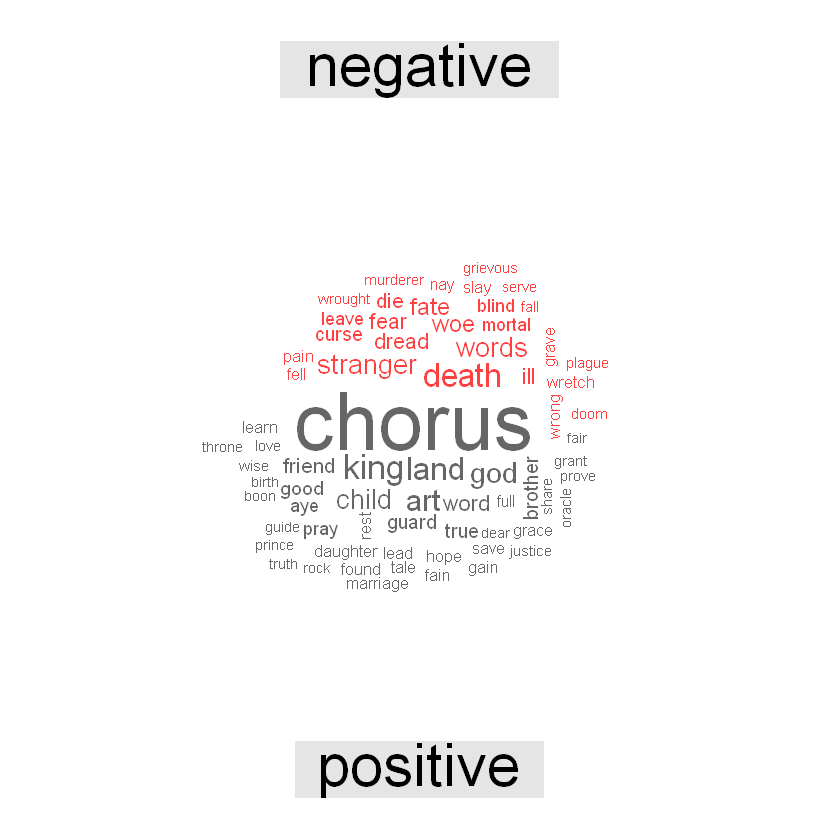

In [21]:
#LÉXICO NRC
wordcloud_nrc = sentiment_nrc %>% #se define la nube de palabras
    acast(word ~ sentiment, value.var ="n", fill = 0) %>% #se usa la función acast de la librería reshape2 para ajustar el dataframe
    comparison.cloud( colors = c("brown1", "gray40"), max.words=70) #se crean las 2 nubes

# II

### 7.- Para el libro La máquina del tiempo, en la indexación número 35, halle según el léxico de Bing et.al. los capítulos más positivos y más negativos del libro. Al igual que para el libro de Sófocles, construya una nube de palabras que separe los términos positivos y los negativos, sin las palabras vacías.

Joining, by = "word"
Joining, by = "word"


NULL

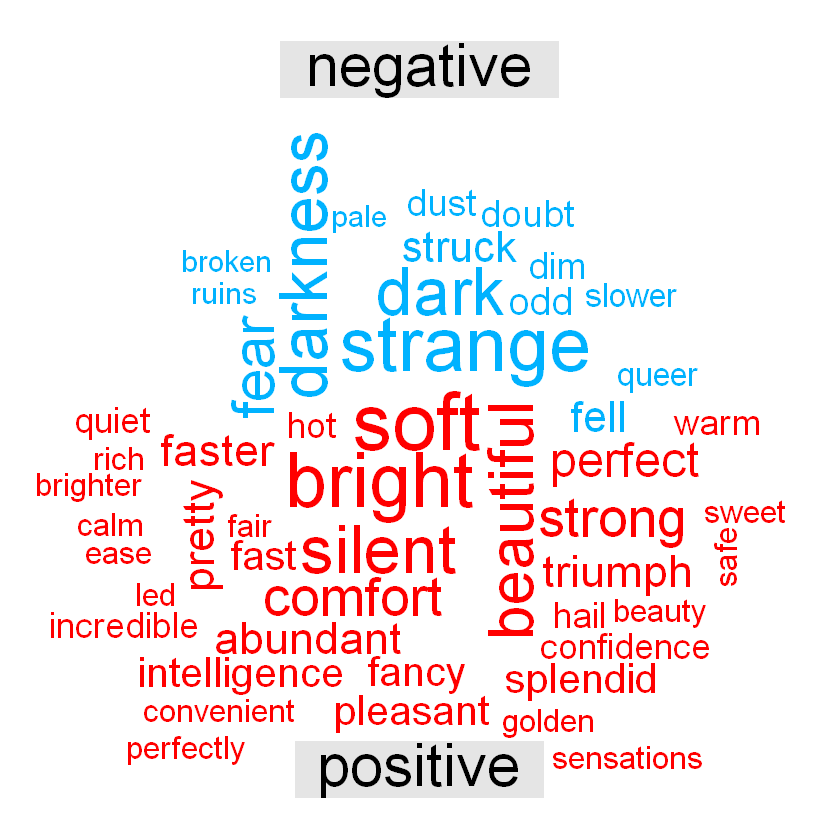

In [23]:
library(gutenbergr)
library(tidytext)
library(dplyr)
library(stringr)
data(stop_words)
library(tidyr)
library(wordcloud)
library(reshape2)

#Ordenando los datos
lib35=gutenberg_download(c(35)) #Se descarga la indexación 35.
lib35=lib35 %>%
    group_by(gutenberg_id) %>%
    mutate(linenumber=row_number(), #Se genera una columna con el número de cada linea del libro
    chapter=cumsum(str_detect(text, regex("^[A-Z]+$", ignore_case = TRUE)))) %>% #Se crea una columna con el numero de cada capitulo.
    ungroup()


lib35_token = lib35 %>% #Se dejan los datos ordenados, creando una columna con tokens y eliminando las palabras vacías.
    unnest_tokens (word, text) %>%
    anti_join(stop_words)

#Este dataframe al estar ordenado, nos servirá a lo largo del proyecto para analizar el texto de diferentes formas.

#Creando la nube de palabras
lib35_cloud = lib35_token %>%
    inner_join(get_sentiments("bing")) %>% #Se agrega los sentimientos desde el lexico "bing"
    count(word, sentiment, sort = TRUE) %>% #se cuenta las palabras según los sentimientos y se ordenan de manera ascendente.
    acast(word ~ sentiment, value.var = "n", fill = 0) %>% #se separan las palabras segun las palabras y el sentimiento de éstas.
    comparison.cloud(colors = c("#00B2FF", "red"), #Se genera la nube de palabras.
        max.words = 50, title.colors = "black")
lib35_cloud

### 8.- Luego de responder a la pregúnta número 7, ¿cuál capítulo tiene la mayor proporción de palabras negativas?

Para calcular la proporción por capítulo, se toma el total como la suma de todas las palabras del capítulo.

In [26]:
lib35_sentiment = lib35_token %>% #Se crea el dataframe "lib35_sentiment" desde el dataframe previamente creado "lib35_token"
    group_by(chapter) %>%
    inner_join(get_sentiments("bing")) %>% #se le agrega la el léxico "bing"
    count(sentiment) %>% #Se cuentan las palabras con sentimientos positivos y negativos según cada capítulo
    mutate(id=1) %>%  
    group_by(id) %>% #Se agrega una columna para manipular los datos desde una columna uniforme
    mutate( prop_percent = n/sum(n) *100) %>% #Se agrega la proporción de los sentimientos en cada capítulo 
    group_by(chapter) %>%
    filter (sentiment == "negative") #Según los capítulos, se utilizan solo los sentimientos negtivos.

#Este ciclo permite mostrar el capítulo mas negativo del libro.
c=1
for (i in lib35_sentiment$prop_percent) {
    if (lib35_sentiment$prop_percent[c] == max(lib35_sentiment$prop_percent)){ #condición, la proporción itinerada debe calzar con el valor demas alta de la proporción.
        cat("El capítulo mas negativo del libro es el",lib35_sentiment$chapter[c])
    }
c=c+1
}

Joining, by = "word"


El capítulo mas negativo del libro es el 5

### 9.- Para el mismo libro, usando el léxico NRC, halle para cada emoción, los capítulos más representativos para cada una.

Para hacer esto, se generará una proporción de los sentimientos, siendo el total la suma de la cantidad de sentimientos que poseen las palabras presentes en todos los capítulos.

Se hace una proporción debido a que, creemos que es la mejor mandera de representar las emociones en cada capítulo, ya que, si solamente se cuentan las palabras, pueden ocurrir errores de interpretación.

In [27]:
c=1
lib35_nrc = lib35_token %>% 
    inner_join(get_sentiments("nrc"))%>% #Al dataframe "lib35_token" se agrega el léxico "nrc"
    count(sentiment, chapter) %>% #Se cuentan la cantidad de sentimientos por capítulos
    group_by(sentiment) %>%
    mutate(prop_percent = n/sum(n)*100, #se agrega la columna que posee la proporcion de cada sentimiento por capítulo.
                                       #Se toma la cantidad de emociones en todos los capítulos como el total.
          max = max(prop_percent)) #Se agrega una columna con la maxima proporcion presente en los sentimientos, para usarla en el siguiente ciclo.
    

for (i in lib35_nrc$prop_percent) { #ciclo para mostrar el capítulo mas representativo de cada sentimiento.
    if (lib35_nrc$prop_percent[c] == lib35_nrc$max[c]){ #condicion, donde el valor maximo de la proporcion de los sentimientos, debe coinsidir con la proporcion del capitulo itinerado
        cat("El sentimiento", lib35_nrc$sentiment[c], "es mas representativo en el capítulo", lib35_nrc$chapter[c], "\n")
    }
c=c+1
}
    
    

Joining, by = "word"


El sentimiento anger es mas representativo en el capítulo 5 
El sentimiento anticipation es mas representativo en el capítulo 5 
El sentimiento disgust es mas representativo en el capítulo 5 
El sentimiento fear es mas representativo en el capítulo 5 
El sentimiento joy es mas representativo en el capítulo 5 
El sentimiento negative es mas representativo en el capítulo 5 
El sentimiento positive es mas representativo en el capítulo 5 
El sentimiento sadness es mas representativo en el capítulo 5 
El sentimiento surprise es mas representativo en el capítulo 5 
El sentimiento trust es mas representativo en el capítulo 5 


### 10.- Usando el léxico AFINN, responda a la pregunta, ¿cuál es el capítulo más negativo?


Para responder la pregunta, se toma una proproción por capítulo, tomando el total como la suma de palabras en el texto que pertenecen al léxico.

In [28]:
lib35_afinn = lib35_token %>%
    inner_join(get_sentiments("afinn")) %>% #Se agrega el lexico "afinn" al dataframe "lib35_token"
    group_by(chapter) %>%
    mutate(id = 1, #Columna nueva para ocupar el total de palabras contabilizadas para usar el léxico
           prop_percent = sum(value)/sum(id)*100) %>%  #Se saca la proporcion de negatividad según capítulo
    group_by(id) %>%
    mutate(min = min(prop_percent)) #Se toma el minimo porcentaje que se puedo obtener para ocuparlo en el siguiente ciclo.
    
c = 1 
k=1 #Contador para imprimir la frase solo una vez.
for (i in lib35_afinn$prop_percent) {  #Ciclo para mostrar el capítulo mas negativo del libro
    if (k == 1) { #Evitar que se muestre el texto mas de una vez.
        if (lib35_afinn$prop_percent[c] == lib35_afinn$min[c]){ #condicion donde la proporcion del capitulo mas negativo debe ser igual al capítulo itinerado
            cat("El capítulo mas negativo del libro es el", lib35_afinn$chapter[c])
            k=k+1}
        
    }
c=c+1}

Joining, by = "word"


El capítulo mas negativo del libro es el 11

### 5.- Dividiendo el texto en trozos de 30 líneas, compare nuevamente los tres léxicos en un gráfico.

Joining, by = "word"
Joining, by = "word"
Joining, by = "word"


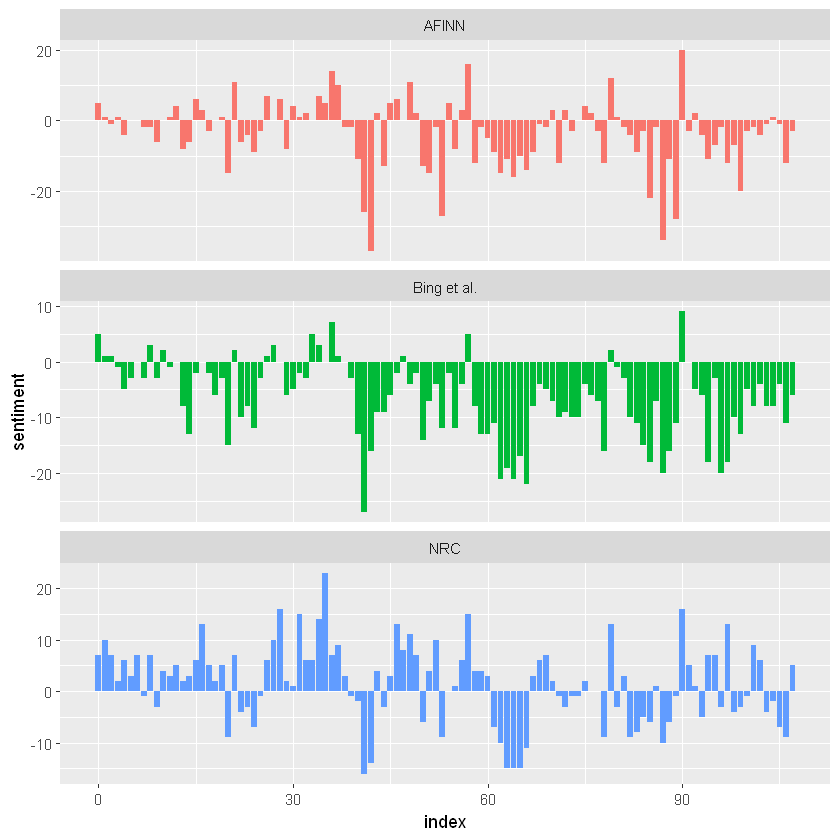

In [32]:
afinn <- lib35_token %>% #se usa el dataframe tokenixado para identificar sentimientos con el léxico afinn
  inner_join(get_sentiments("afinn")) %>% #se unen los sentimientos en un solo dataframe
  group_by(index = linenumber %/% 30) %>% #se agrupan en líneas de 30 (segun el texto sin tokenizar)
  summarise(sentiment = sum(value)) %>% #en vez de count se usa la función summarise para ir sumando los valores de los sentimientos
  mutate(method = "AFINN") #se agrega una variable que solo contendrá AFINN, se usará más adelante
bing_and_nrc <- bind_rows(lib35_token %>% #se usa un solo dataframe para los léxicos bing y nrc
                            inner_join(get_sentiments("bing")) %>% #se unen los sentimientos del léxico bing
                            mutate(method = "Bing et al."), #se agrega la variable method
                          lib35_token %>% #adicionalmente al libro ya tokenizado se le unen los léxicos de nrc
                            inner_join(get_sentiments("nrc") %>%
                                         filter(sentiment %in% c("positive", #se hace el filtro de positivo y negativo para luego dar valores
                                                                 "negative"))) %>%
                            mutate(method = "NRC")) %>% #se le agrega el nombre del léxico como variable
  count(method, index = linenumber %/% 30, sentiment) %>% #se hace un conteo de los sentimientos ya calculados
  spread(sentiment, n, fill = 0) %>% #se usa la función spread para el ajuste matricial
  mutate(sentiment = positive - negative)#finalmente se agrega la última variable equivalente a la diferencia de los sentimientos negativos con positivos
 bind_rows(afinn,
          bing_and_nrc) %>% #ahora se grafica para hacer la comparación, seleccionando a los dataframes realizados
  ggplot(aes(index, sentiment, fill = method)) + #se utilizan como ejes la indexacion de 30 líneas y el valor de los sentimientos
  geom_col(show.legend = FALSE) + #se descarta el uso de legenda
  facet_wrap(~method, ncol = 1, scales = "free_y") #se ajusta el gráfico de manera que queden separados según la variable method.